In [1]:
from pathlib import Path

import albumentations as A
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from get_dataset import AugDataset, EyeDataset

/home/zorkin/Yandex.Disk/Обучение/Hackathon/vladivostok_chempionat/model_train/venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Инициализация дирректорий

In [2]:
base_dataset = Path('dataset/train_dataset_mc')
aug_dataset = Path('dataset/augument')
aug_images = Path('dataset/augument/image')
aug_masks = Path('dataset/augument/mask')

In [3]:
# Инициализируем датасет
dataset = EyeDataset(base_dataset)
dataset_size = len(dataset)

## Задание класса аугументации

In [4]:
transform = A.Compose([
    A.RandomCrop(width=256, height=256),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])

### Создание функции агументации

In [5]:
def transformer(image, mask):
    transformed = transform(image=image, mask=mask)
    transformed_image = transformed['image']
    transformed_mask = transformed['mask']
    return transformed_image, transformed_mask

## Создание функций преобразования изображений

### Функция показа изображения и маски

In [6]:
def show_image(image, mask):
    plt.figure(figsize=(10, 3.5))
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.subplot(1,2,2)
    plt.imshow(mask[..., 0])

### Функция сохранения файлов

In [7]:
def save_images(image, mask, image_name: Path, num: int):
    new_name = f'{image_name.stem}_{num}{image_name.suffix}'
    image_path = Path(aug_images, new_name)
    mask_path = Path(aug_masks, new_name)
    cv2.imwrite(str(image_path), image)
    cv2.imwrite(str(mask_path), mask[..., 0])

### Функция создания пакета преобразованных изображений

In [8]:
def create_aug_images(image, mask, name):
    for num in range(100):
        aug_image, aug_mask = transformer(image, mask)
        save_images(aug_image, aug_mask, name, num)

## Тестирование функционала

In [9]:
image = dataset[1]['image']
name = Path(dataset[1]['image_dir'])
mask = dataset[1]['mask']

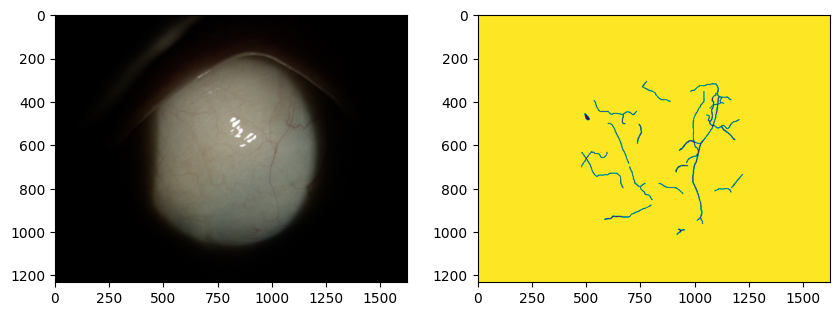

In [10]:
show_image(image, mask)

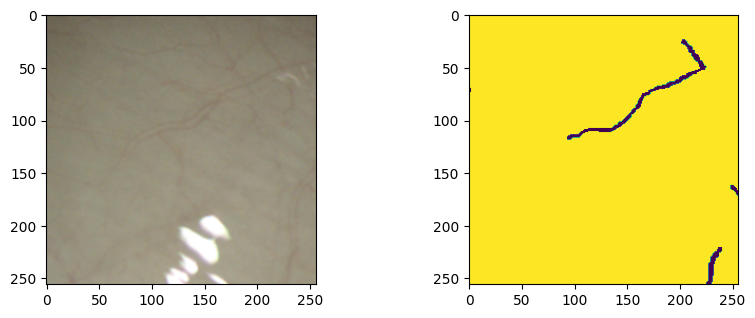

In [11]:
image1, mask1 = transformer(image, mask)
show_image(image1, mask1)

save_images(image, mask, name, 3)

def show_new():
    for i in range(100):
        image = str(aug_images / f'123_{i}.png')
        mask = str(aug_masks / f'123_{i}.png')
        image = cv2.imread(image)
        mask = cv2.imread(mask)
        show_image(image, mask)
show_new()

## Инициализация класса аугументаии

### Создание набора преобразованных изображений по всему первичному датасету

In [12]:
def create_aug_dataset(dataset, datset_size):
    for num in range(dataset_size):
        try:
            sample = dataset[num]
            image = sample['image']
            mask = sample['mask']
            name = Path(sample['image_dir'])        
            create_aug_images(image, mask, name)
        except FileNotFoundError:
            print(name)
            continue

In [13]:
create_aug_dataset(dataset, dataset_size)

dataset/train_dataset_mc/354.png
dataset/train_dataset_mc/63.png
dataset/train_dataset_mc/515.png


In [30]:
% tar -cvf archive.tar.gz /dataset/augument/

UsageError: Line magic function `%` not found.


## Инициализация класса преобразованных изображений

In [14]:
big_dataset = AugDataset(base_dataset, aug_dataset)
big_dataset_size = len(big_dataset)
big_dataset_size

65200

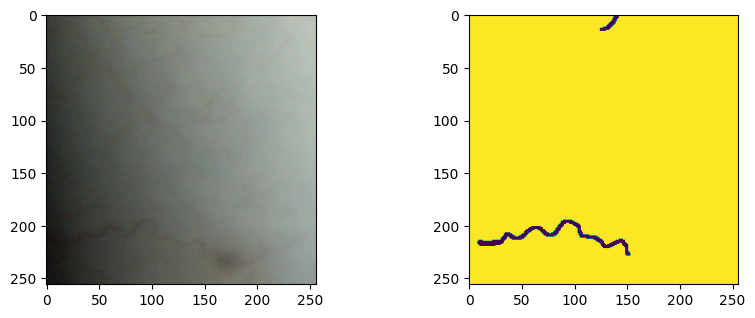

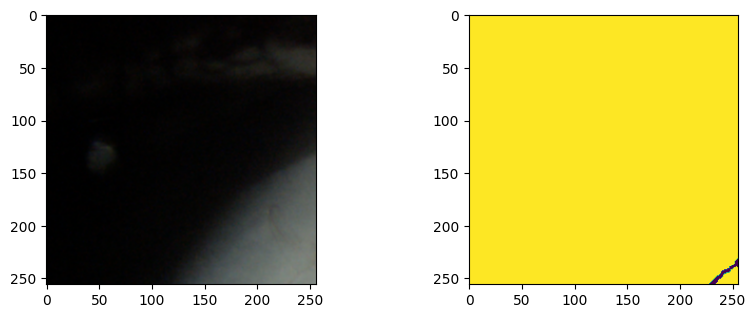

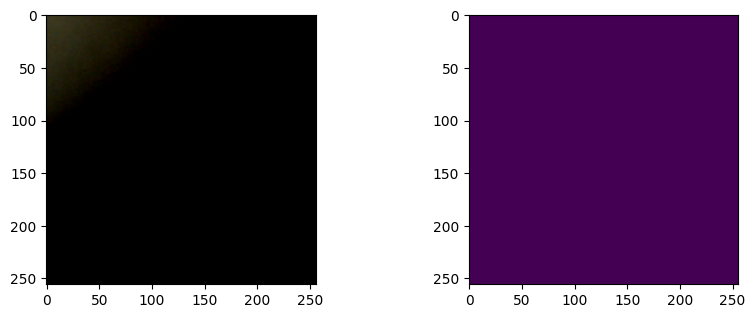

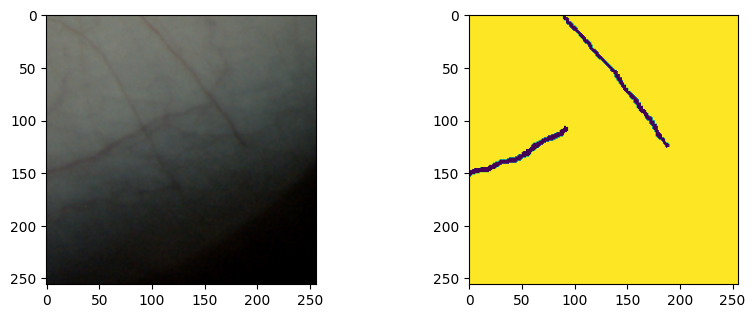

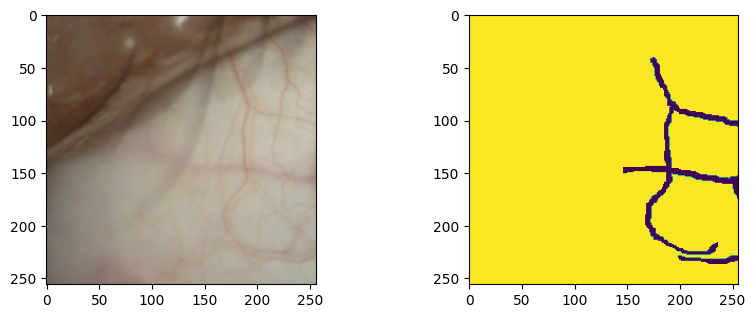

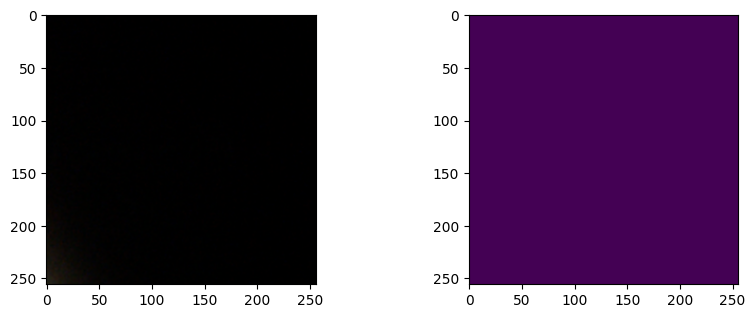

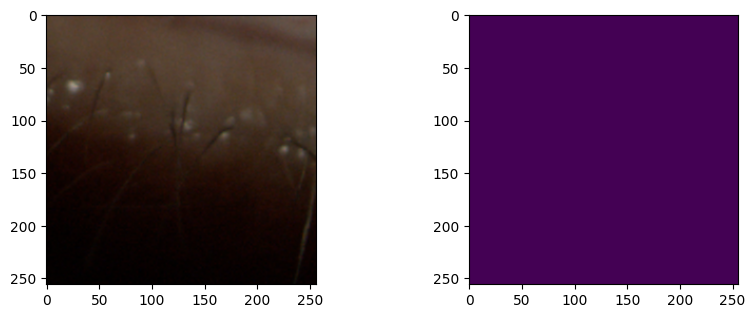

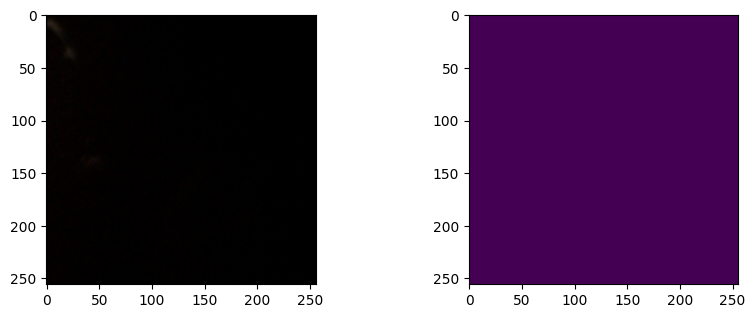

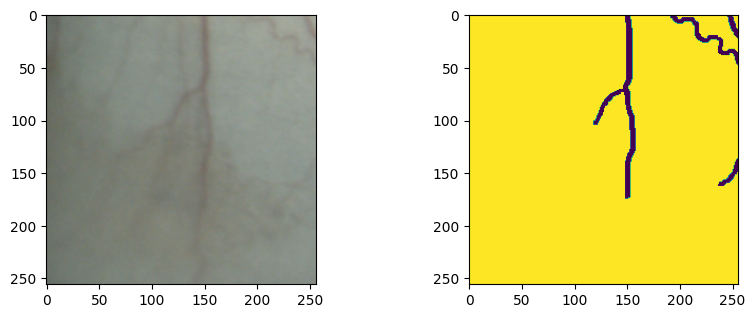

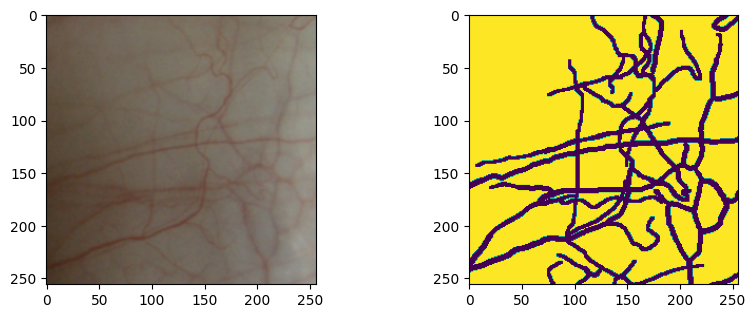

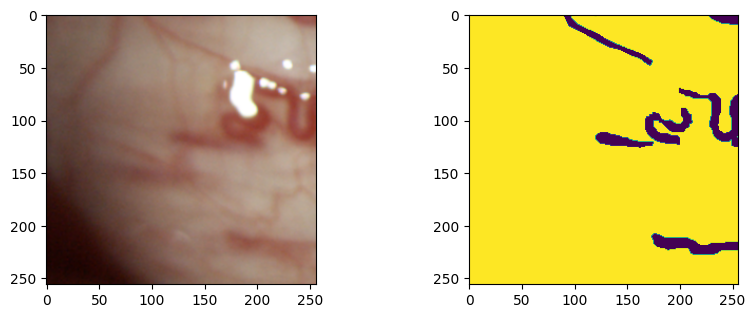

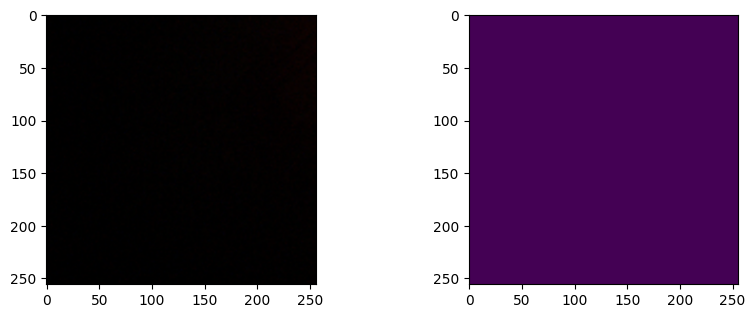

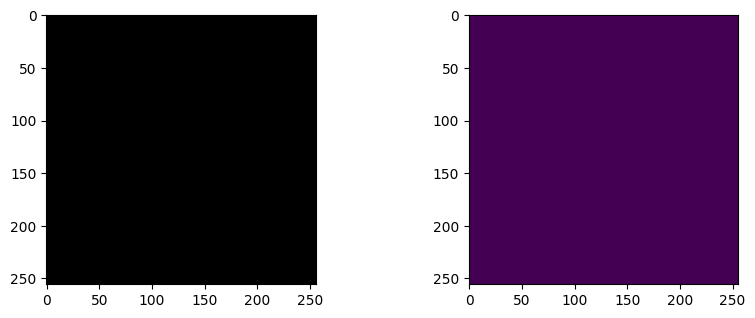

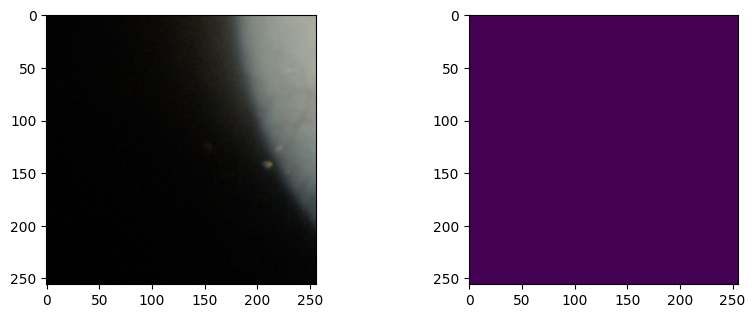

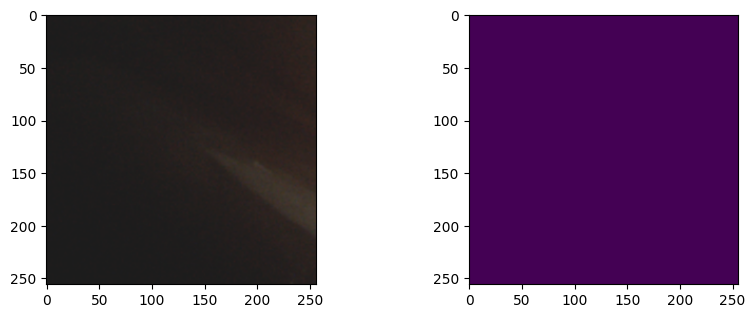

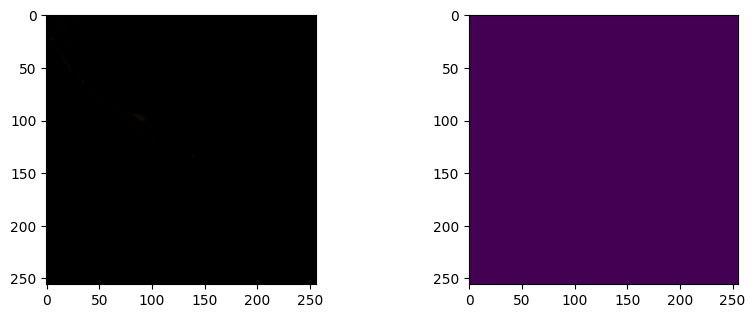

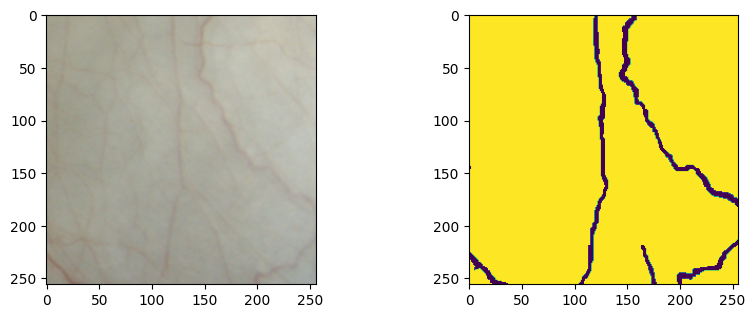

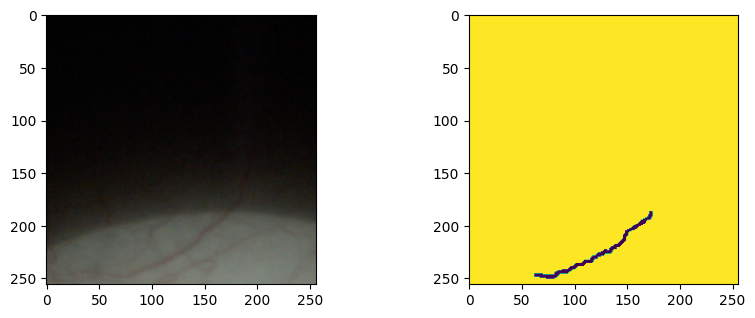

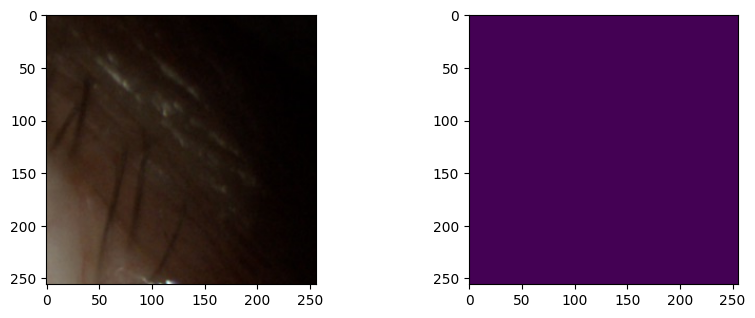

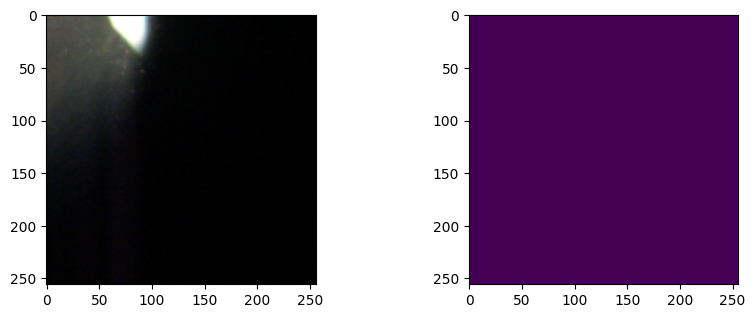

In [24]:
random_image = list(np.random.randint(big_dataset_size, size=20))

for i in random_image:
    sample = big_dataset[i]
    show_image(sample['image'], sample['mask'])